## Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Preprocessing the data

In [3]:
# Flatten the images from 28x28 to 784
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [4]:
# Combine the labels and images
train_data = np.column_stack((train_labels, train_images_flat))
test_data = np.column_stack((test_labels, test_images_flat))

In [5]:
# Create DataFrames
columns = ['label'] + [f'pixel{i}' for i in range(train_images_flat.shape[1])]
train_df = pd.DataFrame(train_data, columns=columns)
test_df = pd.DataFrame(test_data, columns=columns)

In [6]:
# Save DataFrames to CSV
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

print("MNIST data has been successfully saved to CSV files.")

MNIST data has been successfully saved to CSV files.


In [7]:
df=pd.read_csv("train.csv")

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(60000, 785)

In [10]:
df=np.array(df)
m,n=df.shape
np.random.shuffle(df)
#m=number of images,n=image pixel

In [11]:
df_test=df[0:1000].T
Y_test=df_test[0]
X_test=df_test[1:]

In [12]:
X_test=X_test/255.
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
df_train=df[1000:].T
Y_train=df_train[0]
X_train=df_train[1:n]
X_train=X_train/255.

In [14]:
X_train.shape

(784, 59000)

### Initializing parameters

In [15]:
def init_params():
    weights1=np.random.rand(10,784)-0.5
    bias1=np.random.rand(10,1)-0.5
    weights2=np.random.rand(10,10)-0.5
    bias2=np.random.rand(10,1)-0.5
    return weights1, bias1, weights2, bias2

### Forward Propagation

In [16]:
#activation functions 
def RelU(hidden):
    return np.maximum(0,hidden)

def softmax(hidden):
    activated= np.exp(hidden)/sum(np.exp(hidden))
    return activated

#forward propagation    
def forward_prop(weights1, bias1, weights2, bias2, X):
    hidden1=weights1.dot(X)+bias1
    activated1=RelU(hidden1)
    hidden2=weights2.dot(activated1)+bias2
    activated2=softmax(hidden2)
    return hidden1, activated1, hidden2, activated2

### One-hot-encoding 

In [17]:
def one_hot_encode(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

In [18]:
'''
#what does the function one_hot_encode do?
Y=np.array([1,2,2,4,5,9])
one_hot_Y=np.zeros((Y.size,Y.max()+1))
one_hot_Y[np.arange(Y.size),Y]=1
one_hot_Y.T'''

'\n#what does the function one_hot_encode do?\nY=np.array([1,2,2,4,5,9])\none_hot_Y=np.zeros((Y.size,Y.max()+1))\none_hot_Y[np.arange(Y.size),Y]=1\none_hot_Y.T'

In [19]:
#derivation of activation function used in backpropagation
def deriv_ReLU(hidden):
    return hidden>0

### Backpropagation

In [20]:
def back_propagation(hidden1, activated1, hidden2, activated2,weights1, weights2, X, Y):
    
    one_hot_Y=one_hot_encode(Y)
    
    dhidden2=activated2-one_hot_Y
    dweights2=1/m*dhidden2.dot(activated1.T)
    dbias2=1/m*np.sum(dhidden2)
    
    dhidden1=weights2.T.dot(dhidden2)*deriv_ReLU(hidden1)
    dweights1=1/m*dhidden1.dot(X.T)
    dbias1=1/m*np.sum(dhidden1)
    
    return dweights1,dbias1,dweights2,dbias2    

### Updating parameters

In [21]:
def update_params(weights1, bias1, weights2, bias2, dweights1, dbias1, dweights2, dbias2, alpha):
    weights1=weights1-alpha*dweights1
    bias1=bias1-alpha*dbias1
    
    weights2=weights2-alpha*dweights2
    bias2=bias2-alpha*dbias2
    
    return weights1,bias1,weights2,bias2

### Gradient descent and accuracy

In [22]:
def get_predictions(activated2):
    return np.argmax(activated2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,iterations,alpha):
    weights1, bias1, weights2, bias2=init_params()
    for i in range(iterations):
        hidden1, activated1, hidden2, activated2 = forward_prop(weights1, bias1, weights2, bias2, X)
        dweights1, dbias1, dweights2, dbias2 = back_propagation(hidden1, activated1, hidden2, activated2,weights1, weights2, X, Y)
        weights1,bias1,weights2,bias2=update_params(weights1, bias1,weights2,bias2, dweights1, dbias1, dweights2, dbias2, alpha)
        if (i%10==0):
            print("iteration : ",i)
            predictions=get_predictions(activated2)
            print("Accuracy: ",get_accuracy(predictions,Y))
    return weights1,bias1,weights2,bias2

### Running the code

In [23]:
weights1,bias1,weights2,bias2=gradient_descent(X_train,Y_train,900,0.1)

iteration :  0
[9 9 8 ... 0 5 9] [4 1 0 ... 9 4 0]
Accuracy:  0.07623728813559322
iteration :  10
[9 9 8 ... 0 5 0] [4 1 0 ... 9 4 0]
Accuracy:  0.19983050847457628
iteration :  20
[7 1 8 ... 0 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.2892033898305085
iteration :  30
[7 1 8 ... 3 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.35177966101694913
iteration :  40
[9 1 0 ... 8 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.3999491525423729
iteration :  50
[9 1 0 ... 8 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.44413559322033896
iteration :  60
[9 1 0 ... 8 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.4822542372881356
iteration :  70
[9 1 0 ... 8 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.5141525423728813
iteration :  80
[9 1 0 ... 8 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.5451864406779661
iteration :  90
[9 1 0 ... 4 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.5725254237288135
iteration :  100
[9 1 0 ... 4 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.5980338983050848
iteration :  110
[9 1 0 ... 4 4 0] [4 1 0 ... 9 4 0]
Accuracy:  0.6176101694915255
iteration :

In [24]:
def make_predictions(X, weights1, bias1, weights2, bias2):
    _, _, _, activated2 = forward_prop(weights1, bias1, weights2, bias2, X)
    predictions = get_predictions(activated2)
    return predictions

def test_prediction(index, weights1, bias1, weights2, bias2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], weights1, bias1, weights2, bias2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


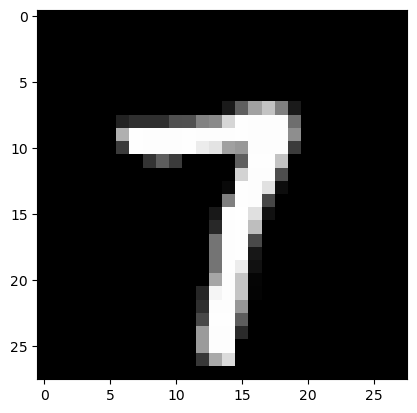

In [25]:
test_prediction(7, weights1, bias1, weights2, bias2)

Prediction:  [9]
Label:  9


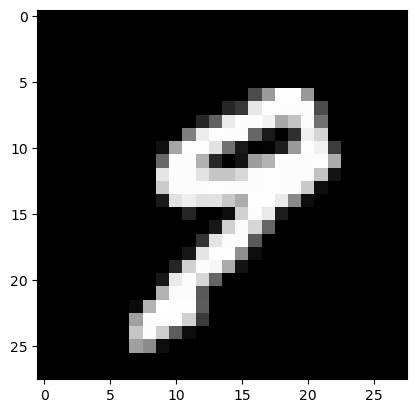

In [26]:
test_prediction(17, weights1, bias1, weights2, bias2)

Prediction:  [1]
Label:  1


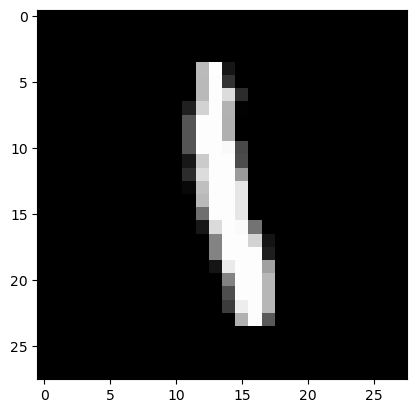

In [27]:
test_prediction(82, weights1, bias1, weights2, bias2)